# Finding Similar Movies

We'll start by loading up the MovieLens dataset. Using Pandas, we can very quickly load the rows of the u.data and u.item files that we care about, and merge them together so we can work with movie names instead of ID's.


# Import the libraries

In [1]:
import pandas as pd
import numpy as np

Importing tha data

In [4]:
r_cols = ['user_id', 'movie_id', 'rating']
ratings=pd.read_csv('C:/Users/Beast/Desktop/u.data',sep='\t',names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('C:/Users/Beast/Desktop/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

In [5]:
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


## Exploratory Analysis

In [6]:
ratings.describe()

,movie_id,user_id,rating
count,100003.000000,100003.000000,100003.000000
mean,425.520914,462.470876,3.529864
std,330.797791,266.622454,1.125704
min,1.000000,0.000000,1.000000
25%,175.000000,254.000000,3.000000
50%,322.000000,447.000000,4.000000
75%,631.000000,682.000000,4.000000
max,1682.000000,943.000000,5.000000


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 4 columns):
movie_id    100003 non-null int64
title       100003 non-null object
user_id     100003 non-null int64
rating      100003 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [8]:
#Importing Visualisation Libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

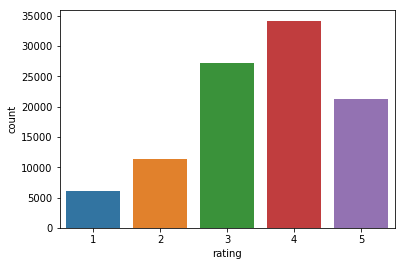

In [9]:
sns.countplot(ratings['rating'])

In [10]:
#Checking the rating Count

ratings.groupby('rating').size()

rating
1     6111
2    11370
3    27145
4    34174
5    21203
dtype: int64

In [18]:
#Finding the most rated movie

ratings.groupby('movie_id').size().sort_values(ascending=False).head()

movie_id
50     584
258    509
100    508
181    507
294    485
dtype: int64

In [17]:
#movie_id=50 
ratings[ratings['movie_id']==50].head()

#It's STAR WARS!

,movie_id,title,user_id,rating
6402,50,Star Wars (1977),0,5
6403,50,Star Wars (1977),290,5
6404,50,Star Wars (1977),79,4
6405,50,Star Wars (1977),2,5
6406,50,Star Wars (1977),8,5


Now the pivot_table function on a DataFrame will construct a user / movie rating matrix. Here NaN indicates missing data - movies that specific users didn't rate.

In [19]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's extract a Series of users who rated Star Wars:

In [20]:
starWarsRatings = movieRatings['Star Wars (1977)']
starWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Pandas' corrwith function makes it really easy to compute the pairwise correlation of Star Wars' vector of user rating with every other movie! After that, we'll drop any results that have no data, and construct a new DataFrame of movies and their correlation score (similarity) to Star Wars:

In [22]:
similarMovies = movieRatings.corrwith(starWarsRatings)
similarMovies = similarMovies.dropna()
df = pd.DataFrame(similarMovies)
df.head(15)

,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [25]:
similarMovies.sort_values(ascending=False)

title
No Escape (1994)                                                                     1.000000
Man of the Year (1995)                                                               1.000000
Hollow Reed (1996)                                                                   1.000000
Commandments (1997)                                                                  1.000000
Cosi (1996)                                                                          1.000000
Stripes (1981)                                                                       1.000000
Golden Earrings (1947)                                                               1.000000
Mondo (1996)                                                                         1.000000
Line King: Al Hirschfeld, The (1996)                                                 1.000000
Outlaw, The (1943)                                                                   1.000000
Hurricane Streets (1998)                              

Our results are probably getting messed up by movies that have only been viewed by a handful of people who also happened to like Star Wars. So we need to get rid of movies that were only watched by a few people that are producing fake results. Let's construct a new DataFrame that counts up how many ratings exist for each movie, and also the average rating 

In [26]:
movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})
movieStats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

Let's get rid of any movies rated by fewer than 100 people, and check the top-rated ones that are left:

In [27]:
popularMovies = movieStats['rating']['size'] >= 100
movieStats[popularMovies].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          584  4.359589
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [29]:
#Creating the final dataframe

df = movieStats[popularMovies].join(pd.DataFrame(similarMovies, columns=['similarity']))

C:\Users\Beast\Anacondanew\envs\tensorflow_env\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [30]:
df.head()

,"(rating, size)","(rating, mean)",similarity
title,,,
101 Dalmatians (1996),109,2.908257,0.211132
12 Angry Men (1957),125,4.344000,0.184289
2001: A Space Odyssey (1968),259,3.969112,0.230884
Absolute Power (1997),127,3.370079,0.085440
"Abyss, The (1989)",151,3.589404,0.203709


In [31]:
df.sort_values(['similarity'], ascending=False)[:15]

,"(rating, size)","(rating, mean)",similarity
title,,,
Star Wars (1977),584,4.359589,1.000000
"Empire Strikes Back, The (1980)",368,4.206522,0.748353
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
"Frighteners, The (1996)",115,3.234783,0.332729


**We can also filter out the movie we started from - of course Star Wars is 100% similar to itself.But these results looks good**

## Thanks!